In [20]:
import pandas as pd
import numpy as np
import math

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams["figure.figsize"] = (8, 6)

import warnings
warnings.filterwarnings('ignore')

In [5]:
df = pd.read_csv("./public/bank-additional.csv", sep=";")
df.head(5)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,30,blue-collar,married,basic.9y,no,yes,no,cellular,may,fri,...,2,999,0,nonexistent,-1.8,92.893,-46.2,1.313,5099.1,no
1,39,services,single,high.school,no,no,no,telephone,may,fri,...,4,999,0,nonexistent,1.1,93.994,-36.4,4.855,5191.0,no
2,25,services,married,high.school,no,yes,no,telephone,jun,wed,...,1,999,0,nonexistent,1.4,94.465,-41.8,4.962,5228.1,no
3,38,services,married,basic.9y,no,unknown,unknown,telephone,jun,fri,...,3,999,0,nonexistent,1.4,94.465,-41.8,4.959,5228.1,no
4,47,admin.,married,university.degree,no,yes,no,cellular,nov,mon,...,1,999,0,nonexistent,-0.1,93.200,-42.0,4.191,5195.8,no


In [12]:
print(df.shape[0])
df.tail(5)

4119


,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
4114,30,admin.,married,basic.6y,no,yes,yes,cellular,jul,thu,...,1,999,0,nonexistent,1.4,93.918,-42.7,4.958,5228.1,no
4115,39,admin.,married,high.school,no,yes,no,telephone,jul,fri,...,1,999,0,nonexistent,1.4,93.918,-42.7,4.959,5228.1,no
4116,27,student,single,high.school,no,no,no,cellular,may,mon,...,2,999,1,failure,-1.8,92.893,-46.2,1.354,5099.1,no
4117,58,admin.,married,high.school,no,no,no,cellular,aug,fri,...,1,999,0,nonexistent,1.4,93.444,-36.1,4.966,5228.1,no
4118,34,management,single,high.school,no,yes,no,cellular,nov,wed,...,1,999,0,nonexistent,-0.1,93.200,-42.0,4.120,5195.8,no


In [32]:
#this is the target variable saying that y - has the client subscribed a term deposit? (binary: yes,no)
df.y.value_counts(normalize=True).round(2)

y
no     0.89
yes    0.11
Name: proportion, dtype: float64

In [16]:
#no null values
df.isna().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

In [22]:
df.describe().round(2)

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,4119.00,4119.00,4119.00,4119.00,4119.00,4119.00,4119.00,4119.00,4119.00,4119.00
mean,40.11,256.79,2.54,960.42,0.19,0.08,93.58,-40.50,3.62,5166.48
std,10.31,254.70,2.57,191.92,0.54,1.56,0.58,4.59,1.73,73.67
min,18.00,0.00,1.00,0.00,0.00,-3.40,92.20,-50.80,0.64,4963.60
25%,32.00,103.00,1.00,999.00,0.00,-1.80,93.08,-42.70,1.33,5099.10
50%,38.00,181.00,2.00,999.00,0.00,1.10,93.75,-41.80,4.86,5191.00
75%,47.00,317.00,3.00,999.00,0.00,1.40,93.99,-36.40,4.96,5228.10
max,88.00,3643.00,35.00,999.00,6.00,1.40,94.77,-26.90,5.04,5228.10


In [26]:
col_list = df.columns.tolist()
col_list[0]

'age'

In [28]:
df.describe(include=["object"])

,job,marital,education,default,housing,loan,contact,month,day_of_week,poutcome,y
count,4119,4119,4119,4119,4119,4119,4119,4119,4119,4119,4119
unique,12,4,8,3,3,3,2,10,5,3,2
top,admin.,married,university.degree,no,yes,no,cellular,may,thu,nonexistent,no
freq,1012,2509,1264,3315,2175,3349,2652,1378,860,3523,3668


In [30]:
df.marital.value_counts(normalize=True).round(2)

marital
married     0.61
single      0.28
divorced    0.11
unknown     0.00
Name: proportion, dtype: float64

In [34]:
df.sort_values(by="duration", ascending=True).head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
1950,39,admin.,married,high.school,no,yes,no,telephone,may,tue,...,4,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1600,28,self-employed,single,basic.9y,no,yes,no,telephone,may,tue,...,4,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2534,57,admin.,divorced,university.degree,no,no,no,telephone,nov,wed,...,1,999,0,nonexistent,-0.1,93.200,-42.0,4.663,5195.8,no
1896,30,self-employed,single,basic.9y,no,no,yes,telephone,oct,mon,...,1,999,0,nonexistent,-1.1,94.601,-49.5,0.953,4963.6,no
2202,29,technician,married,university.degree,no,no,no,cellular,jul,thu,...,23,999,0,nonexistent,1.4,93.918,-42.7,4.968,5228.1,no


In [46]:
groupby1 = df.groupby(["campaign", "job"])["age"].mean().unstack(fill_value=0).reset_index()
groupby1

job,campaign,admin.,blue-collar,entrepreneur,housemaid,management,retired,self-employed,services,student,technician,unemployed,unknown
0,1,38.441648,39.452196,42.720588,45.936170,43.227586,62.771429,40.254237,38.287582,25.875,38.501730,40.326923,47.588235
1,2,38.443548,38.715686,43.500000,46.965517,41.597561,60.142857,37.000000,38.178218,26.500,38.525253,41.333333,47.857143
2,3,37.297521,39.661765,38.523810,48.769231,41.512821,59.458333,42.440000,38.637931,28.375,38.465116,37.363636,45.285714
3,4,37.571429,39.712121,33.200000,41.875000,42.173913,58.052632,43.947368,39.518519,29.000,37.410256,36.200000,46.166667
4,5,38.270270,39.586207,42.166667,41.600000,43.166667,64.333333,42.125000,40.692308,31.000,39.541667,44.500000,51.000000
5,6,38.000000,41.650000,54.000000,41.500000,42.375000,65.500000,42.500000,36.750000,28.000,37.000000,33.000000,0.000000
6,7,37.100000,39.500000,0.000000,0.000000,37.000000,0.000000,45.800000,47.200000,0.000,41.583333,43.000000,0.000000
7,8,35.500000,35.625000,0.000000,44.000000,41.333333,55.666667,33.500000,40.500000,0.000,43.333333,31.500000,0.000000
8,9,43.444444,38.600000,47.000000,0.000000,38.000000,0.000000,40.000000,33.400000,0.000,40.500000,41.000000,0.000000
9,10,40.777778,42.000000,0.000000,0.000000,51.000000,57.000000,39.000000,45.000000,0.000,42.000000,25.000000,38.000000


In [50]:
df.sort_values(by=["duration", "age"], ascending=[True, False])

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
1950,39,admin.,married,high.school,no,yes,no,telephone,may,tue,...,4,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1600,28,self-employed,single,basic.9y,no,yes,no,telephone,may,tue,...,4,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2534,57,admin.,divorced,university.degree,no,no,no,telephone,nov,wed,...,1,999,0,nonexistent,-0.1,93.200,-42.0,4.663,5195.8,no
934,31,blue-collar,single,basic.9y,no,yes,no,telephone,sep,mon,...,1,999,0,nonexistent,-1.1,94.199,-37.5,0.879,4963.6,no
1896,30,self-employed,single,basic.9y,no,no,yes,telephone,oct,mon,...,1,999,0,nonexistent,-1.1,94.601,-49.5,0.953,4963.6,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3266,49,blue-collar,married,basic.6y,no,yes,no,telephone,may,fri,...,2,999,0,nonexistent,1.1,93.994,-36.4,4.864,5191.0,yes
1685,33,blue-collar,single,high.school,no,no,no,cellular,may,mon,...,1,999,0,nonexistent,-1.8,92.893,-46.2,1.244,5099.1,yes
1392,47,admin.,divorced,university.degree,no,yes,no,telephone,jun,fri,...,3,999,0,nonexistent,1.4,94.465,-41.8,4.967,5228.1,yes
1546,46,admin.,divorced,high.school,no,yes,no,telephone,oct,fri,...,1,999,0,nonexistent,-0.1,93.798,-40.4,5.045,5195.8,no


In [52]:
df.apply(np.max)

age                      88
job                 unknown
marital             unknown
education           unknown
default                 yes
housing                 yes
loan                    yes
contact           telephone
month                   sep
day_of_week             wed
duration               3643
campaign                 35
pdays                   999
previous                  6
poutcome            success
emp.var.rate            1.4
cons.price.idx       94.767
cons.conf.idx         -26.9
euribor3m             5.045
nr.employed          5228.1
y                       yes
dtype: object

In [55]:
df.loan.value_counts()

d = {"unknown":0, "yes":1, "no": 2}
df.loan = df.loan.map(d)

df.loan.head()

0   NaN
1   NaN
2   NaN
3   NaN
4   NaN
Name: loan, dtype: float64

In [57]:
df.y = df.y.replace({"no": 0, "yes": 1})
df.y.head()

0    0
1    0
2    0
3    0
4    0
Name: y, dtype: int64

In [61]:
print(f'number of people still invested in the buisness subscription {(df["y"].mean())*100}')

number of people still invested in the buisness subscription 10.949259529011895


What are the mean values ​​of numerical features among the attracted clients?

In [66]:
df[df.y == 1].select_dtypes(include=["int32","int64", "float32", "float64"]).mean()

age                 41.889135
loan                      NaN
duration           560.787140
campaign             1.980044
pdays              778.722838
previous             0.585366
emp.var.rate        -1.177384
cons.price.idx      93.417268
cons.conf.idx      -39.786475
euribor3m            2.145448
nr.employed       5093.118625
y                    1.000000
dtype: float64

What is the average call duration for the attracted clients?

In [73]:
acd = round(df[df.y == 1]["duration"].mean(), 2)
print(acd)
acd_mins = acd / 60
print("Average call duration for attracted clients =", acd_mins.round(), "min", int(acd) % 60, "sec")

560.79
Average call duration for attracted clients = 9.0 min 20 sec


What is the average age of attracted (y == 1) and unmarried ('marital' == 'single') clients?

In [76]:
print("Average age of engaged and Single Clients : ", int(df[(df.y == 1) & (df.marital == "single")]["age"].mean()))

Average age of engaged and Single Clients :  32


In [80]:
df[-1:]

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
4118,34,management,single,high.school,no,yes,NaN,cellular,nov,wed,...,1,999,0,nonexistent,-0.1,93.2,-42.0,4.12,5195.8,0


In [82]:
pd.crosstab(df.y, df.marital)

marital,divorced,married,single,unknown
y,,,,
0,403,2257,998,10
1,43,252,155,1


In [84]:
pd.crosstab(df.y, df.marital, normalize=True)

marital,divorced,married,single,unknown
y,,,,
0,0.097839,0.547949,0.242292,0.002428
1,0.010439,0.061180,0.037630,0.000243


In [86]:
df.pivot_table(["age", "duration"], ["job"], aggfunc="mean")

,age,duration
job,,
admin.,38.240119,261.871542
blue-collar,39.265837,261.852941
entrepreneur,42.202703,249.202703
housemaid,45.672727,229.663636
management,42.429012,246.799383
retired,60.873494,311.789157
self-employed,40.679245,254.924528
services,38.513995,232.529262
student,26.695122,287.134146


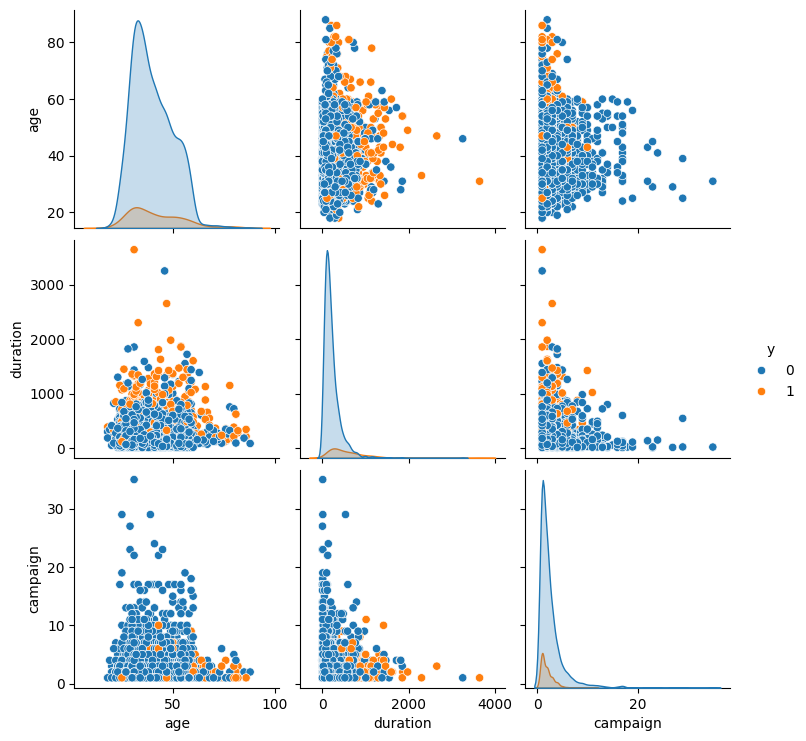

In [87]:
sns.pairplot(df[["age", "duration", "campaign", "y"]], hue="y", diag_kind="kde")
plt.show()

<Axes: >

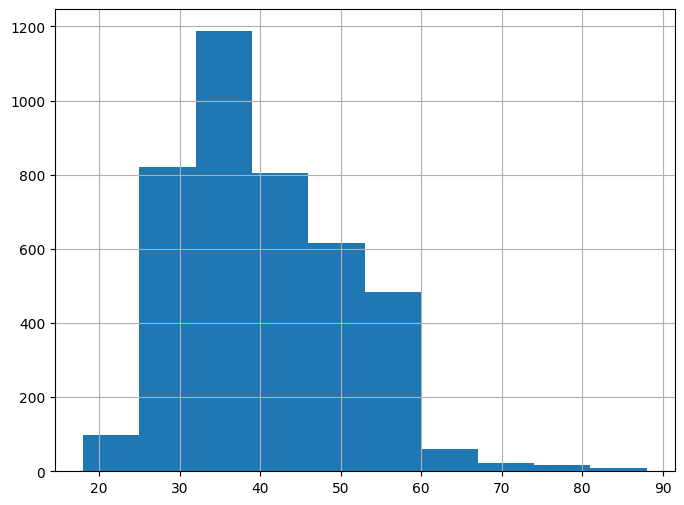

In [90]:
df.age.hist()

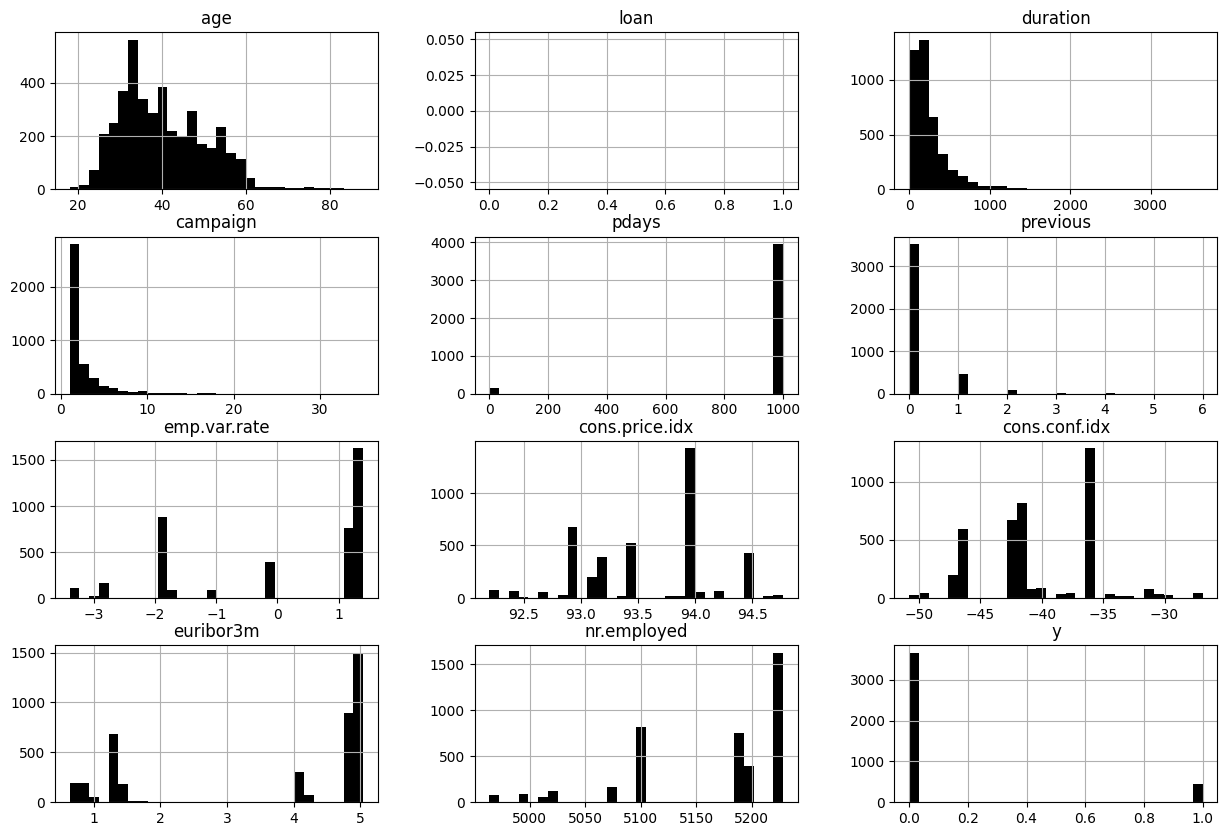

In [92]:
df.hist(color='k', bins=30, figsize=(15,10))
plt.show()

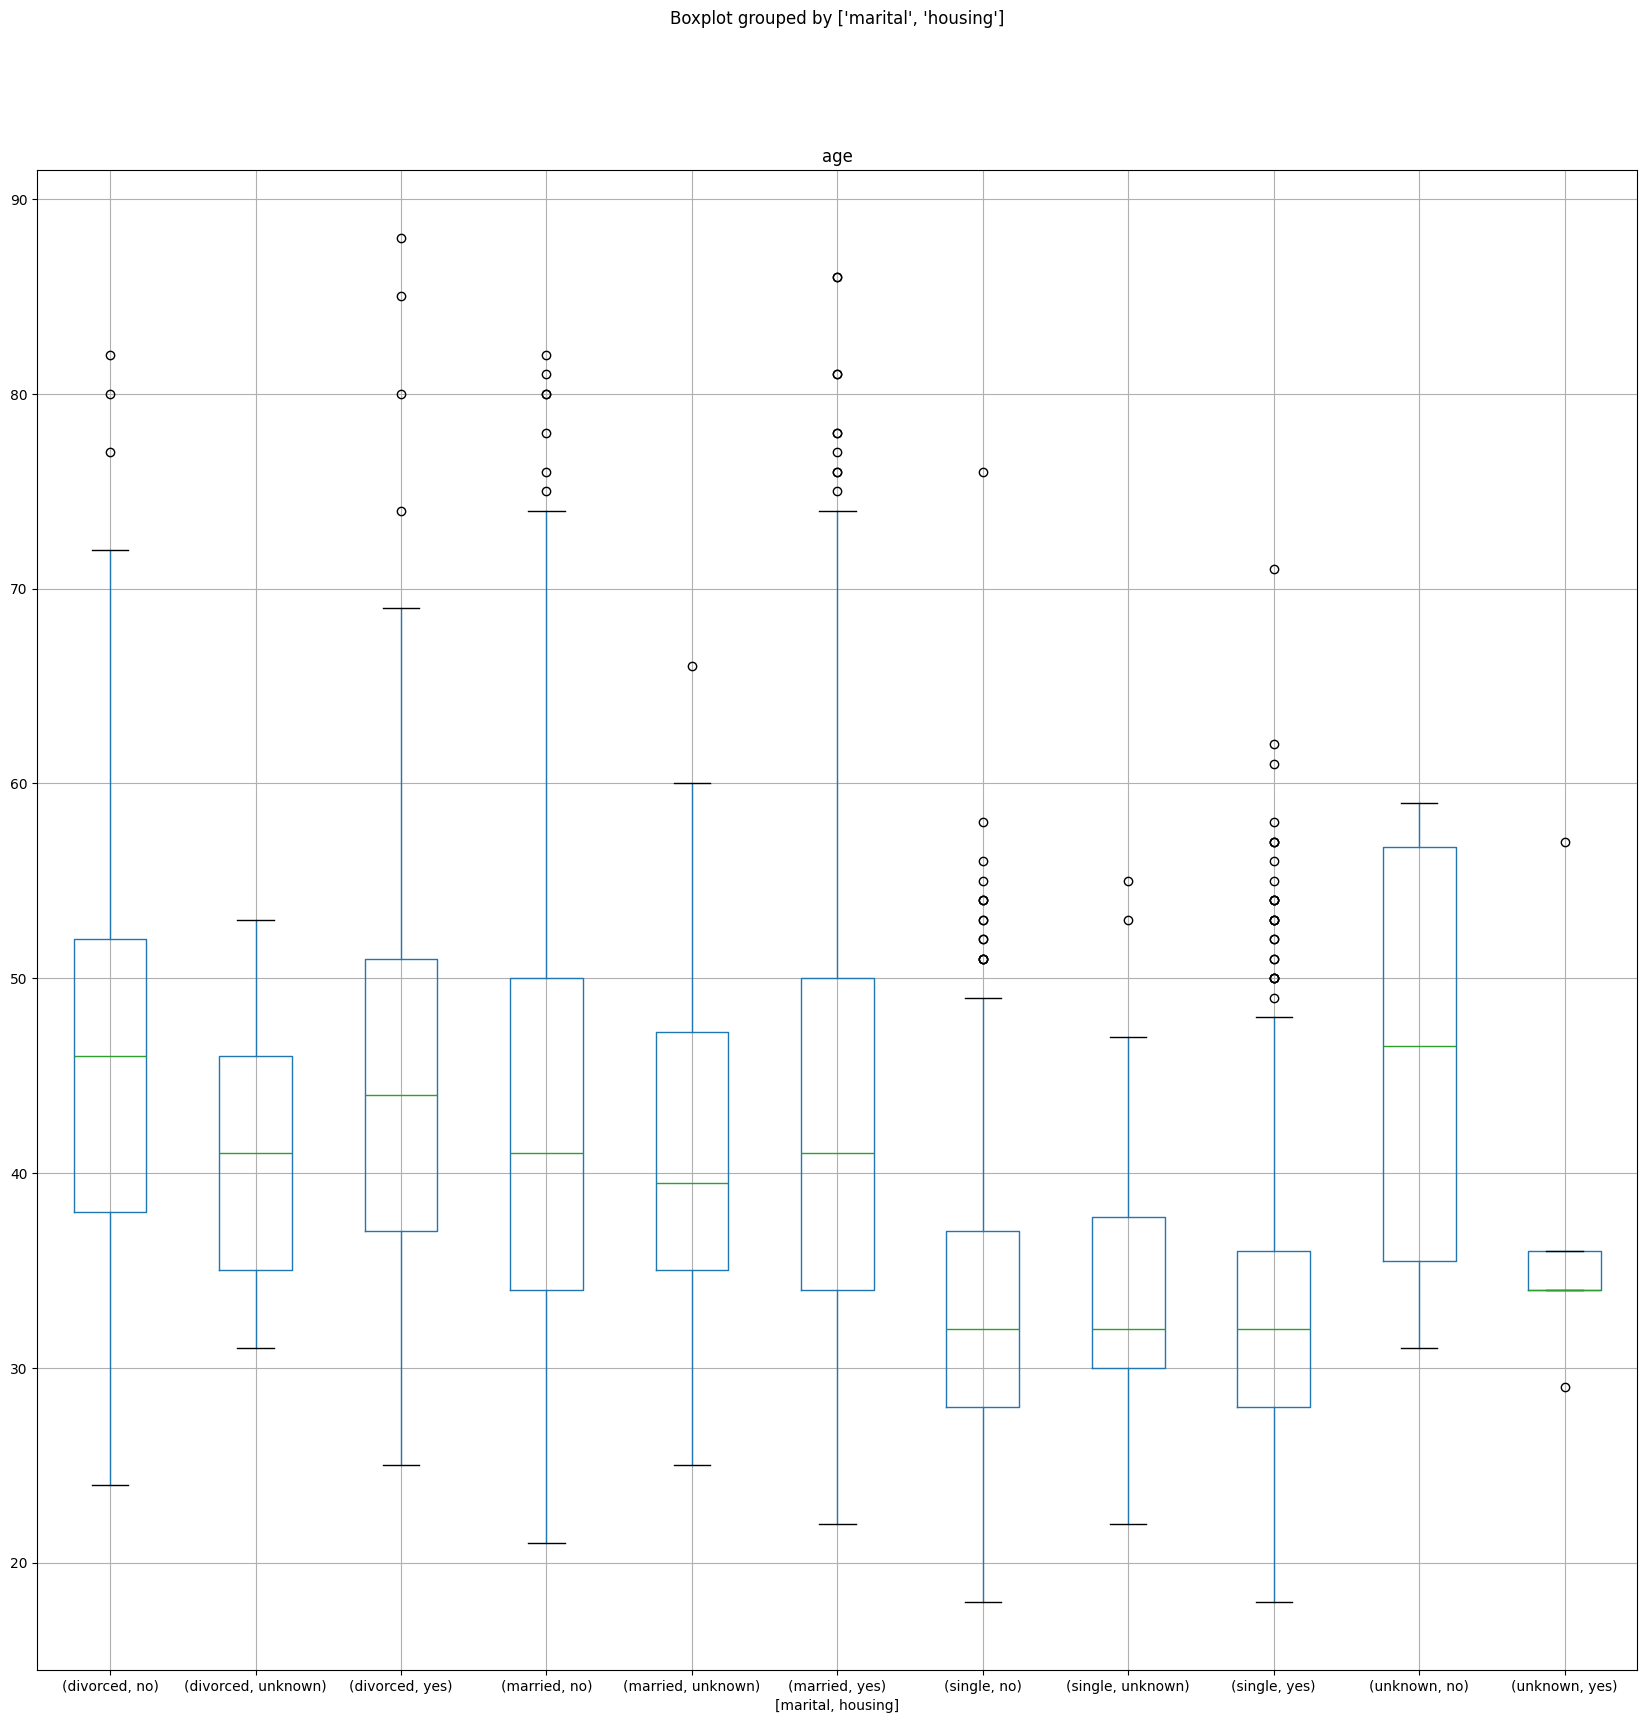

In [94]:
df.boxplot(column = "age", by = ["marital", "housing"], figsize = (20, 20))
plt.show()

In [96]:
df.sort_values(by = "campaign", ascending = False).head(10)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
2552,31,services,single,high.school,no,no,NaN,cellular,jul,thu,...,35,999,0,nonexistent,1.4,93.918,-42.7,4.968,5228.1,0
3241,39,services,married,high.school,no,yes,NaN,cellular,jul,thu,...,29,999,0,nonexistent,1.4,93.918,-42.7,4.968,5228.1,0
3564,25,admin.,single,basic.9y,no,no,NaN,cellular,jul,thu,...,29,999,0,nonexistent,1.4,93.918,-42.7,4.968,5228.1,0
56,29,admin.,single,university.degree,no,yes,NaN,telephone,jun,fri,...,27,999,0,nonexistent,1.4,94.465,-41.8,4.959,5228.1,0
2485,41,technician,married,high.school,no,yes,NaN,telephone,jun,fri,...,24,999,0,nonexistent,1.4,94.465,-41.8,4.959,5228.1,0
2988,45,services,married,professional.course,no,yes,NaN,cellular,jul,mon,...,23,999,0,nonexistent,1.4,93.918,-42.7,4.962,5228.1,0
2202,29,technician,married,university.degree,no,no,NaN,cellular,jul,thu,...,23,999,0,nonexistent,1.4,93.918,-42.7,4.968,5228.1,0
3569,31,admin.,single,high.school,no,no,NaN,telephone,may,thu,...,22,999,0,nonexistent,1.1,93.994,-36.4,4.860,5191.0,0
713,43,admin.,married,high.school,no,yes,NaN,cellular,jul,mon,...,22,999,0,nonexistent,1.4,93.918,-42.7,4.962,5228.1,0
886,56,technician,married,university.degree,unknown,no,NaN,cellular,jul,mon,...,19,999,0,nonexistent,1.4,93.918,-42.7,4.960,5228.1,0


In [98]:
df.pivot_table(
    ["age", "campaign"],
    ["education"],
    aggfunc = ["mean", "count", "median"],
)

mean           count          median         
                           age  campaign   age campaign    age campaign
education                                                              
basic.4y             47.657343  2.421911   429      429   48.0      2.0
basic.6y             40.144737  2.649123   228      228   39.0      2.0
basic.9y             39.231707  2.348432   574      574   38.0      2.0
high.school          38.097720  2.630836   921      921   36.0      2.0
illiterate           42.000000  4.000000     1        1   42.0      4.0
professional.course  40.207477  2.512150   535      535   38.0      2.0
university.degree    39.017405  2.583070  1264     1264   36.0      2.0
unknown              42.826347  2.538922   167      167   41.0      2.0

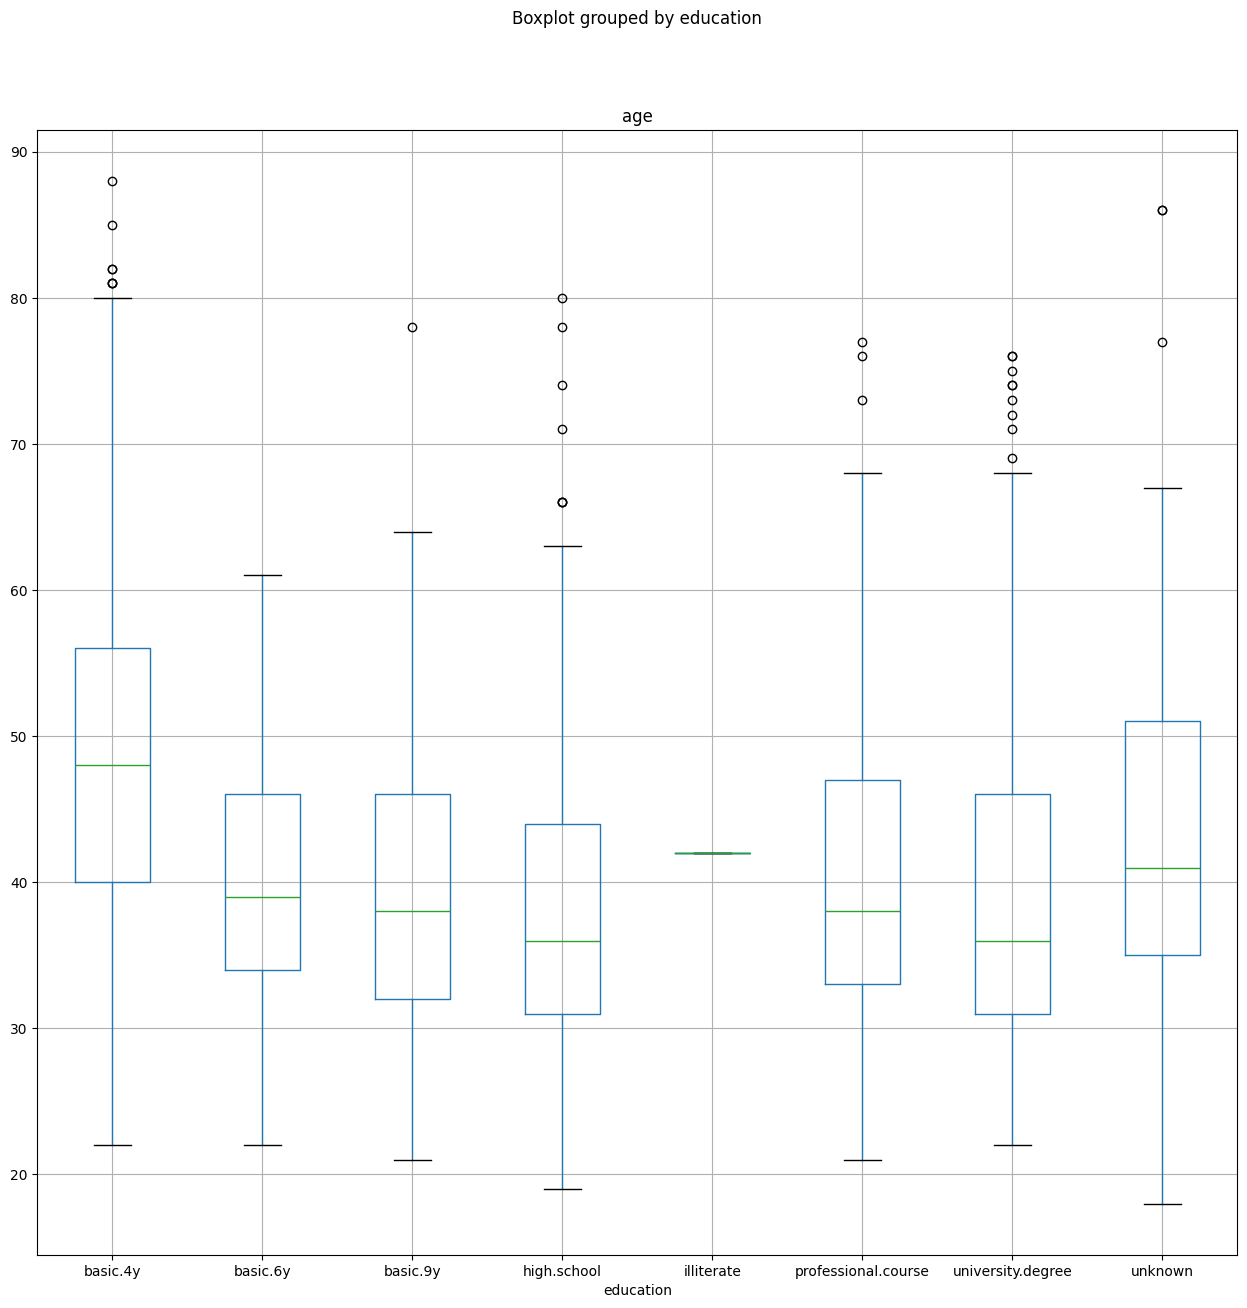

In [99]:
df.boxplot(column = "age", by = "education", figsize = (15, 15))
plt.show()